In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import pickle

In [6]:
df = pd.read_csv("../datasets/youtoxic_english_1000.csv")
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df = df.iloc[:, 2:]
df.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
for column in df.columns[2:]:
    temp = df.query(f"~IsToxic & {column}")
    print(len(temp))

0
0
0
0
0
0
0
0
0
0
0


In [22]:
new_df = df[["Text", "IsToxic"]]
new_df["IsToxic"] = new_df["IsToxic"].astype(int)
new_df.head()

/tmp/ipykernel_60519/2190859252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["IsToxic"] = new_df["IsToxic"].astype(int)


,Text,IsToxic
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


In [23]:
new_df["IsToxic"].value_counts()

IsToxic
0    538
1    462
Name: count, dtype: int64

In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")
    return text

In [26]:
new_df["Text"] = new_df["Text"].map(lambda text: clean_text(text))
new_df.head()

/tmp/ipykernel_60519/2604749505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Text"] = new_df["Text"].map(lambda text: clean_text(text))


,Text,IsToxic
0,if only people would just take a step back and...,0
1,law enforcement is not trained to shoot to app...,1
2,dont you reckon them black lives matter banner...,1
3,there are a very large number of people who do...,0
4,the arab dude is absolutely right he should ha...,0


In [27]:
vect = TfidfVectorizer(max_features=5000, stop_words="english")
X = vect.fit_transform(new_df["Text"])
y = new_df["IsToxic"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = Sequential([
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [38]:
history = model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 0.6898 - accuracy: 0.5625 - val_loss: 0.6873 - val_accuracy: 0.5437
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.5953 - val_loss: 0.6821 - val_accuracy: 0.5625
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6501 - accuracy: 0.6359 - val_loss: 0.6752 - val_accuracy: 0.5688
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6144 - accuracy: 0.6844 - val_loss: 0.6668 - val_accuracy: 0.5813
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5683 - accuracy: 0.7781 - val_loss: 0.6574 - val_accuracy: 0.6125
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5171 - accuracy: 0.8875 - val_loss: 0.6487 - val_accuracy: 0.6438
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.4581 - accuracy: 0.9359 - val_loss: 0.6424 - val_accuracy: 0.6187
Epoch 8/10
20/20 [=

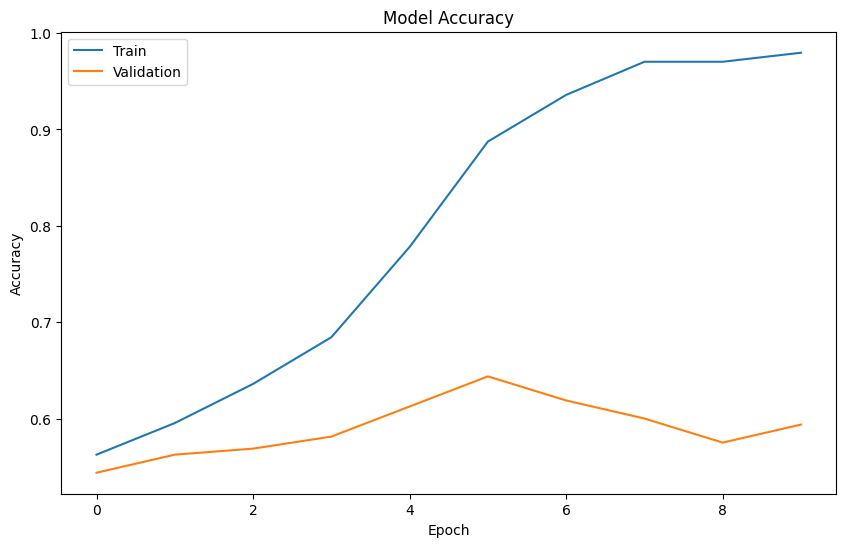

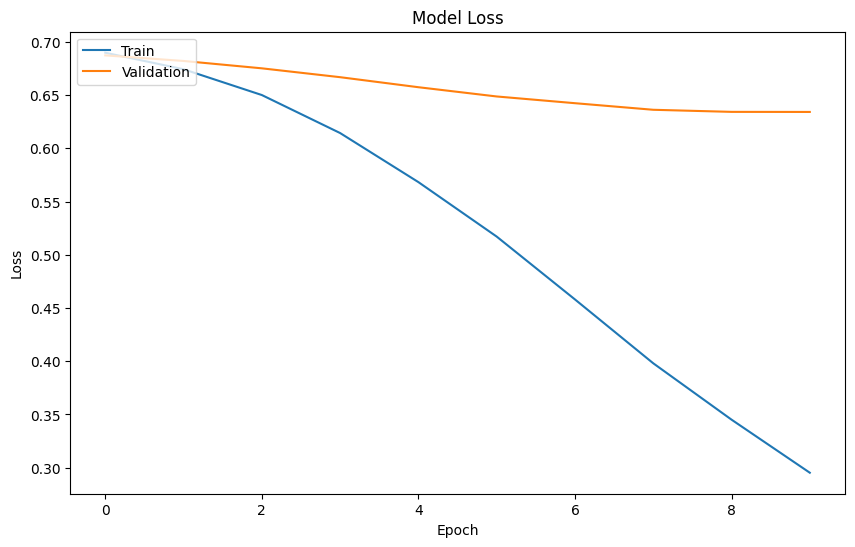

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
serial_path = "../serialized_models/"

with open(serial_path + "tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vect, f)

# Save Keras model
model.save(serial_path + "toxic_comment_model.h5")